<a href="https://colab.research.google.com/github/soobook/PyTorch-DL/blob/main/code/PT15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15회차: DC-GAN을 활용한 손글씨 모방하기 (1) - 이론과 개념

In [1]:
# 시각화 준비
!pip install koreanize_matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.5 MB/s eta 0:00:00


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# 1. MNIST 데이터 불러오기 (Tensor로 변환하지 않고 PIL 그대로 불러옴)
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 10.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.0MB/s]


In [3]:
# 2. 데이터셋 전체 크기(샘플 수) 출력
print(f"[Train] num_samples = {len(mnist_train)}")
print(f"[Test ] num_samples = {len(mnist_test)}")

# 3. 대표 샘플 하나 꺼내 모양/모드 확인 (PIL: size=(W,H), mode='L' for grayscale)
img_tr, label_tr = mnist_train[0]
img_te, label_te = mnist_test[0]
print("\n[Train] sample[0] -> size (W,H):", img_tr.size, ", mode:", img_tr.mode, ", label:", label_tr)
print("[Test ] sample[0] -> size (W,H):", img_te.size, ", mode:", img_te.mode, ", label:", label_te)


[Train] num_samples = 60000
[Test ] num_samples = 10000

[Train] sample[0] -> size (W,H): (28, 28) , mode: L , label: 5
[Test ] sample[0] -> size (W,H): (28, 28) , mode: L , label: 7


In [4]:
# 자료형 image를 numpy ndarray로 모두 변환해 3차원 배열로
x_train = np.stack([np.array(img) for img, _ in mnist_train])
y_train = np.array([label for _, label in mnist_train])
x_test = np.stack([np.array(img) for img, _ in mnist_test])
y_test = np.array([label for _, label in mnist_test])

In [5]:
# 4. 데이터 기본 정보 출력
print("훈련 데이터 shape:", x_train.shape)   # (60000, 28, 28)
print("테스트 데이터 shape:", x_test.shape)  # (10000, 28, 28)
print("훈련 레이블 개수:", len(y_train))

# 5. 레이블 통계 확인
label_counts = Counter(y_train)
print("\n클래스별 샘플 수:")
for label, count in sorted(label_counts.items()):
    print(f"숫자 {label}: {count}개")

훈련 데이터 shape: (60000, 28, 28)
테스트 데이터 shape: (10000, 28, 28)
훈련 레이블 개수: 60000

클래스별 샘플 수:
숫자 0: 5923개
숫자 1: 6742개
숫자 2: 5958개
숫자 3: 6131개
숫자 4: 5842개
숫자 5: 5421개
숫자 6: 5918개
숫자 7: 6265개
숫자 8: 5851개
숫자 9: 5949개


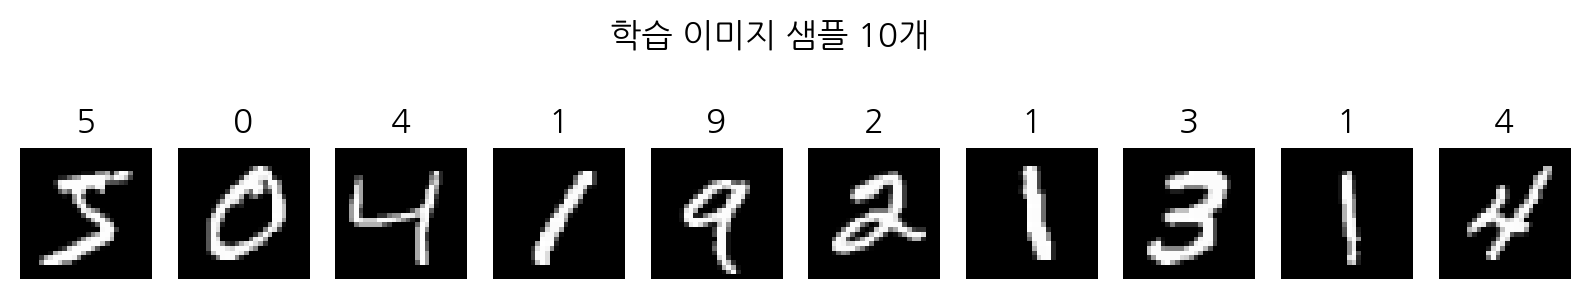

In [20]:
# 6. 학습 데이터 첫 이미지 10개 출력
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.suptitle("학습 이미지 샘플 10개")
plt.show()

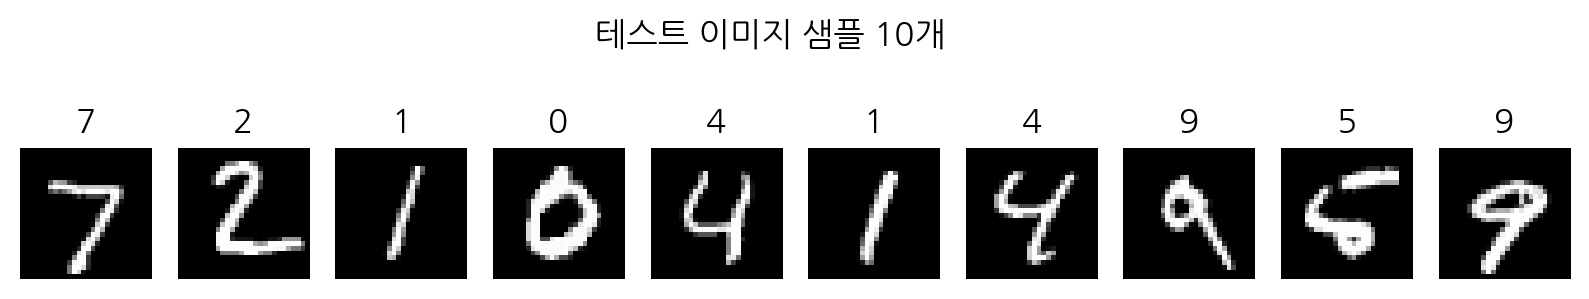

In [21]:
# 7. 테스트 데이터 첫 이미지 10개 출력
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"{y_test[i]}")
    plt.axis('off')
plt.suptitle("테스트 이미지 샘플 10개")
plt.show()

In [17]:
np.where(y_test == 1) # 조건이 True인 위치들의 인덱스 배열을 담은 튜플 반환

(array([   2,    5,   14, ..., 9978, 9984, 9994]),)

In [18]:
np.where(y_test == 1)[0] # 튜플의 0번째 원소 → 실제 인덱스들이 담긴 넘파이 배열

array([   2,    5,   14, ..., 9978, 9984, 9994])

In [19]:
np.where(y_test == 1)[0][0] # 그 인덱스 배열의 첫 번째 값 → 즉, 라벨 d의 첫 등장 인덱스

np.int64(2)

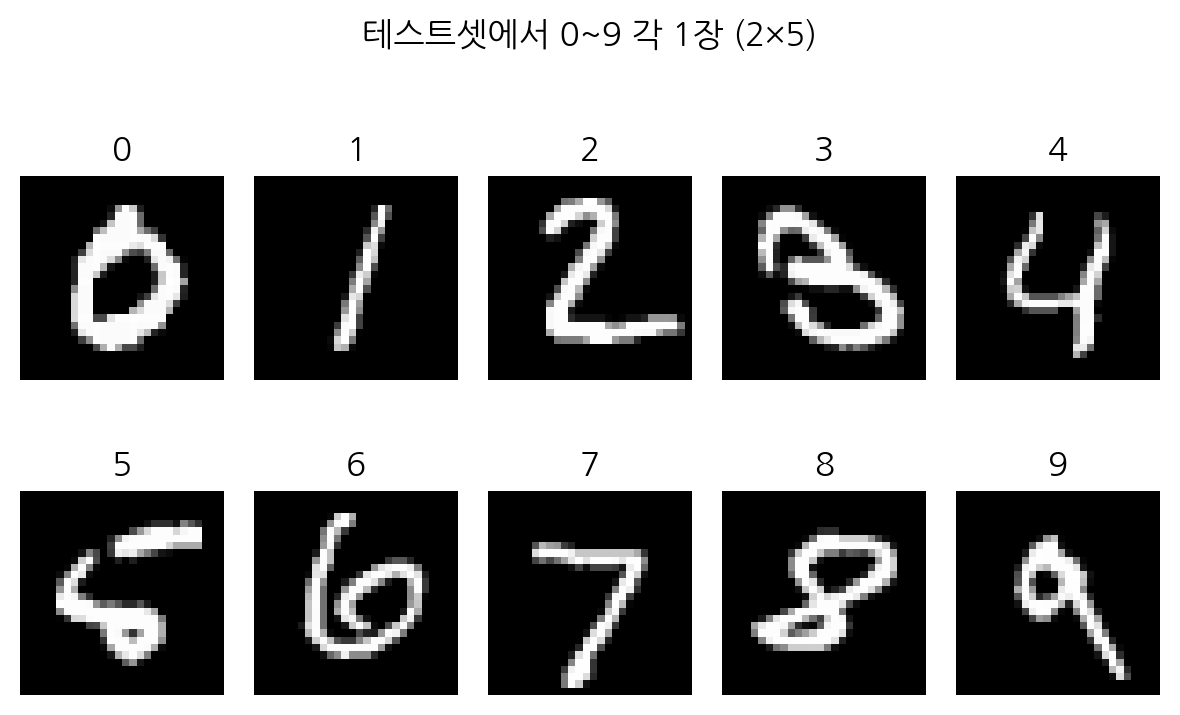

In [11]:
indices = [np.where(y_test == d)[0][0] for d in range(10)]

plt.figure(figsize=(6, 4))
for k, d in enumerate(range(10)):
    i = indices[d]
    plt.subplot(2, 5, k + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"{d}")
    plt.axis('off')
plt.suptitle("테스트셋에서 0~9 각 1장 (2×5)")
plt.tight_layout()
plt.show()

## 종료